# Statuses

|Sr No| Status| Task|
|-----|-------|-----|
|1| Done|Modularity|
|2| Done |Basic Information on code|
|3| Done |Add prediction|
|4| Urgent| `.npz` working tree|
|5|  |Utilization of tfdocs.plots|
|6|     |Randomised Prediction|
|7|    |Documenting iterations|


# Importing Libraries

In [ ]:
%tensorflow_version 2.1.0

`%tensorflow_version` only switches the major version: 1.x or 2.x.
You set: `2.1.0`. This will be interpreted as: `2.x`.


TensorFlow is already loaded. Please restart the runtime to change versions.


In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import time

import tensorflow as tf
from tensorflow import keras
from keras.callbacks import ModelCheckpoint
print("TensorFlow version: "+str(tf.__version__))

TensorFlow version: 2.3.0


In [ ]:
pip install -q pyyaml h5py  # Required to save models in HDF5 format

In [ ]:
!pip install -q git+https://github.com/tensorflow/docs

In [ ]:
import tensorflow_docs as tfdocs
import tensorflow_docs.modeling
# import tensorflow_docs.plots

# Loading `.npz` file for training

---



In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
data = np.load('/content/drive/My Drive/traindata.npz', allow_pickle=True)
x = data['x']
# print(x)
y = data['y']
print("X: " + str(x.shape) + "\nY: "+ str(y.shape))

X: (972800, 9)
Y: (972800,)


The model once threw an error related to the type of numbers, code in next cell has solved the issue

In [ ]:
tf.keras.backend.set_floatx('float64')

# Model Parameters

<div class="alert alert-block alert-warning">
<b>Warning:</b> Please verify the Model parameters
</div>

In [ ]:
def build_model():
    model = keras.Sequential([
        keras.layers.Dense(100, activation = 'relu', input_shape = [x.shape[1]]),
        keras.layers.Dense(100, activation = 'relu'),
        # keras.layers.Dense(750, activation = 'relu'),
        # keras.layers.Dense(500, activation = 'relu'),
        # keras.layers.Dense(500, activation = 'relu'),
        keras.layers.Dense(1, activation= 'sigmoid'),
    ])
    
    optimizer = 'adam'
    
    model.compile(
        loss = 'mse',
        optimizer = optimizer,
        metrics = [keras.metrics.BinaryAccuracy(name = "bin-acc")],
    )
    
    return model

## Building Model and Summary

<div class="alert alert-block alert-info">
<b>Note</b> Verify Model.</div>

In [ ]:
model = build_model()
model.summary()

Model: "sequential_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_30 (Dense)             (None, 100)               1000      
_________________________________________________________________
dense_31 (Dense)             (None, 100)               10100     
_________________________________________________________________
dense_32 (Dense)             (None, 1)                 101       
Total params: 11,201
Trainable params: 11,201
Non-trainable params: 0
_________________________________________________________________


### Untrained Prediction 

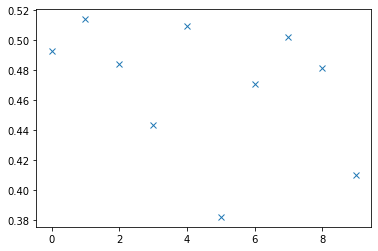

In [ ]:
example_batch = x[:10,:]
# print(example_batch.shape)
example_result = model.predict(example_batch)
plt.plot(example_result, 'x')

In [ ]:
filepath="save{epoch:03d}-{bin-acc:.3f}.hdf5"
checkpoint = ModelCheckpoint(filepath, monitor='bin-acc', verbose=1, mode='max')
callbacks_list = [checkpoint]

# Model Fitting

<div class="alert alert-block alert-danger">
<b>Danger:</b> Resource Intensive Block of Code
</div>

<div class="alert alert-block alert-warning">
<b>HEATING CAUTION:</b> The System heats up during execution of the following code. Make sure there is cooling available.
</div>

<div class="alert alert-block alert-warning">
<b>Warning</b> Following Block of code takes around 30-40 minutes for execution. <br> Proceed with caution. 
</div>

<div class="alert alert-block alert-info">
<b>Tip:</b> it is advised to wait untill other important processes on the System are complete</div>

<div class="alert alert-block alert-info">
<b>Info:</b>Following block of code generates large outputs</div>

In [ ]:
%%time
history = model.fit(
    x,y,
    epochs = 10,
    validation_split = 0.20,
    verbose = 1,
    callbacks = callbacks_list
)

Epoch 1/10
24318/24320 [============================>.] - ETA: 0s - loss: 0.0880 - bin-acc: 0.9012
Epoch 00001: saving model to save001-0.901.hdf5
24320/24320 [==============================] - 37s 2ms/step - loss: 0.0880 - bin-acc: 0.9012 - val_loss: 0.0853 - val_bin-acc: 0.9032
Epoch 2/10
24283/24320 [============================>.] - ETA: 0s - loss: 0.0862 - bin-acc: 0.9020
Epoch 00002: saving model to save002-0.902.hdf5
24320/24320 [==============================] - 41s 2ms/step - loss: 0.0862 - bin-acc: 0.9020 - val_loss: 0.0847 - val_bin-acc: 0.9034
Epoch 3/10
24312/24320 [============================>.] - ETA: 0s - loss: 0.0857 - bin-acc: 0.9022
Epoch 00003: saving model to save003-0.902.hdf5
24320/24320 [==============================] - 41s 2ms/step - loss: 0.0857 - bin-acc: 0.9022 - val_loss: 0.0842 - val_bin-acc: 0.9036
Epoch 4/10
24291/24320 [============================>.] - ETA: 0s - loss: 0.0853 - bin-acc: 0.9024
Epoch 00004: saving model to save004-0.902.hdf5
24320/2432

## Training Summary
Following block will show last few lines of the training history

In [ ]:
hist = pd.DataFrame(history.history)
hist['epoch'] = history.epoch
# print(hist.head())
hist.tail()

,loss,bin-acc,val_loss,val_bin-acc,epoch
30,0.062548,0.922560,0.051865,0.934868,30
31,0.059645,0.925893,0.053107,0.934082,31
32,0.056710,0.929230,0.056235,0.930854,32
33,0.054683,0.931638,0.042740,0.949275,33
34,0.052710,0.933851,0.068959,0.917902,34


<B>Prediction on training set</B>
<br>
Example

In [ ]:
model.save('2__300_e35.h5')

In [ ]:
tryhere = keras.models.load_model('weights-improvement-037-0.93501748.hdf5')

In [ ]:
# result = model.predict(example_batch)
# print("Output activations:\n" + str(result))
# print("\nLabelled output: "+str(np.round(result).T))
# result_y = y[:10,]
# print("\nLabels from corresponding Training set: "+str(result_y))

In [ ]:
# plt.plot(result, 'x')
# plt.title('Prediction on Training set')
# plt.show()
# print(example_batch[:,1])

# plt.plot(result_y, 'x')
# plt.title('Labels for corresponding set')
# plt.show()

# Predicting on new data

Reading Data from ` .npz` file written by ` "evaluate file.ipynb"`

In [ ]:
pred = np.load('/content/drive/My Drive/chrono_pred.npz')
pred_x = pred['x']
pred_x.shape

(1062912, 9)

### Predicting 

In [ ]:
pred_new = tryhere.predict(pred_x)

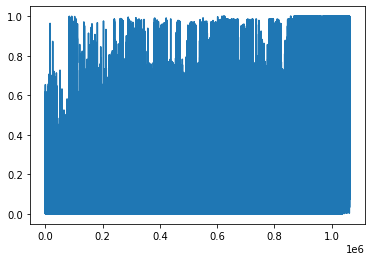

In [ ]:
plt.plot(pred_new)

In [ ]:
pred_mo = model.predict(pred_x)

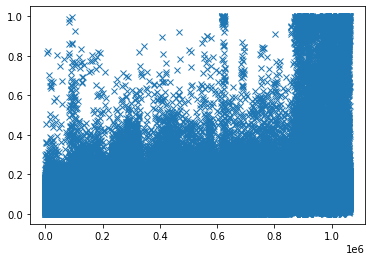

In [ ]:
plt.plot(pred_mo,'x')